# شبکه عصبی عمیق و شبکه عصبی عادی

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

از یک لایه INPUT چهار تا لایه HIDEN و یک لایه خروجی استفاده میشه

# Data Generation

رابطه ما
Y = x^2+5*x+3

In [2]:
x=np.arange(-60,60,0.5)
y=x**2+5*x+3

In [3]:
y.shape

(240,)

train_test_split

با این می توانیم به راحتی داده های تست و ترین رو   از هم جدا کنیم

test_size

مقدار داده هایی که می خواهیم به عنوان داده تست در نظر بگیریم



In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((192,), (48,))

# model 1

model.add
می توان به مدل لایه اضافه کرد
 
 این مدل سه تا لایه دارد 
 
units
تعداد نورون ها

activition
اگر که مشخص نشه به طور عادی یه رابطه خطی در نظر می گیره 

تو تنسورفلو لایه ورودی تعریف نمی کنیم خودش لایه ورودی می ده فقط باید input_shape بهش بدیم
 

In [5]:
model_1=keras.Sequential()
#یک لایه نیازی به ساختش نیست چون input_shape=[1] تعریف کردیم

# یه لایه hiddenداریم  
model_1.add(keras.layers.Dense(units=1024,activation='relu',input_shape=[1]))
# یه لایه خروجی که یک نورون داره فقط
model_1.add(keras.layers.Dense(units=1))

d:\code\venvdatascience\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# کامپایل مدل

loss 

با چه معیاری کامپایل انجام بده


In [6]:
model_1.compile(optimizer='adam',loss='mean_squared_error')

dense
لایه اول

1024 
تعداد نورون

2048
هر نورون دوتا پارامتر داره که مجموع پارامتر ها با 1024 نورون شده اینقدر

dense_1
لایه دوم

یدونه نورون بیشتر نداره برای همون output shape شده یک

چون از لایه denseاستفاده شده به نورون های لایه اول وصله

چون که تعداد وزن ها به یدونه بایاس اضافه شده پارامتر های لایه دوم شده 1025




In [7]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

آموزش دادن به مدل 1

In [8]:
hist_1 = model_1.fit(x_train,y_train,batch_size=64,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 2376247.0000 - val_loss: 2661698.0000
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2656953.5000 - val_loss: 2649537.0000
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2449420.2500 - val_loss: 2637551.2500
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2529811.7500 - val_loss: 2625426.2500
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2427272.5000 - val_loss: 2613191.0000
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2560099.0000 - val_loss: 2600732.5000
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2592989.2500 - val_loss: 2587978.0000
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2491392.5000 - val_loss: 2574799.2500
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2418717.7500 - val_loss: 2561150.7500
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2407342.2500 - val_loss: 2546915.2500
Epoch 11/1000
3/3 ━━━━━━━━━━━

# model 2

In [9]:
model_2=keras.Sequential()
model_2.add(keras.layers.Dense(units=256,activation='relu',input_shape=[1]))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=1))

In [10]:
model_2.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

هرچه قدر تعداد پارامترها بیشتر بشه مسائل پیچیده تر رو دقیق تر حل میکنه

فیت کردن مدل رو داده ها

In [21]:
hist_2=model_2.fit(x_train,y_train,batch_size=64,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 216.7322 - val_loss: 137.4480
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 198.3635 - val_loss: 288.9860
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 308.9900 - val_loss: 125.5529
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 269.5093 - val_loss: 108.2367
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 161.5895 - val_loss: 447.6354
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 523.7360 - val_loss: 201.2882
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 325.0096 - val_loss: 328.0833
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 403.4935 - val_loss: 1332.5723
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 578.8536 - val_loss: 977.8934
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 585.1864 - val_loss: 260.7607
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 301.4753 - val_loss: 266.5835
Epoch 12/1000
3/3 

# comparison

In [13]:
y_pred_1=model_1.predict(x_test)
y_pred_2=model_2.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


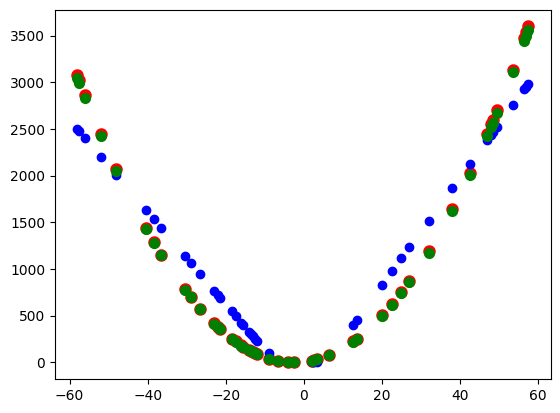

In [14]:
plt.scatter(x_test,y_test,color="red",linewidths=3)
plt.scatter(x_test,y_pred_1,color="blue",linewidths=1)
plt.scatter(x_test,y_pred_2,color="green",linewidths=2)
plt.show()


نمایش تابع هزینه

اگر بخواهیم از یک مقدار به بعد رو ببینیم 
[800:]

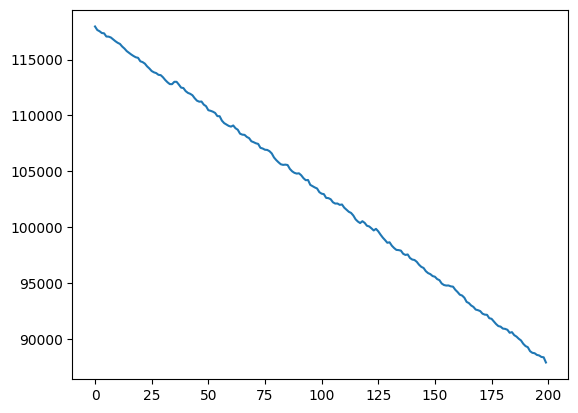

In [20]:
plt.plot(hist_1.history['val_loss'][800:])
plt.show()

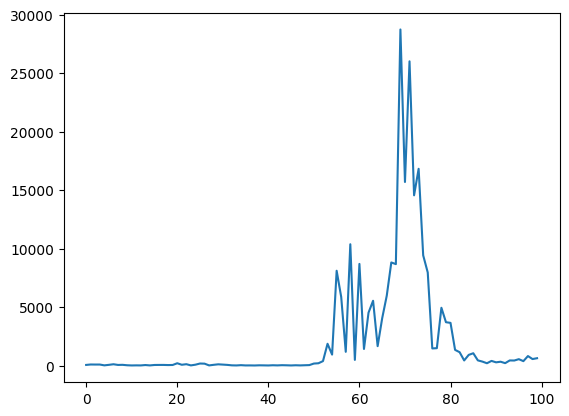

In [24]:
plt.plot(hist_2.history['val_loss'][900:])
plt.show()

با کال بک کردن یک فانکشن بخصوص بهترین مدل رو تشخیص بدیم و ذخیره کنیم